<a href="https://colab.research.google.com/github/Yiling-Li/Sign-Language-Classifier/blob/main/a2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC413 Assignment 2: American Sign Language

**Deadline**: March 4, 2022 by 10pm

**Submission**: Compile and submit a PDF report containing your code, outputs,
and your written solutions. Do not use screenshots and images to present
textual code/output (other than legible, hand-written answer).
You may export the completed notebook on Google Colab, but if you do so
**it is your responsibly to make sure that your code and answers do not get cut off**.

**Late Submission**: Please see the syllabus for the late submission criteria.

**Working with a partner**: You may work with a partner for this assignment.
If you decide to work with a partner, please create your group on Markus by
the deadline, even if you intend to use grace tokens. Markus does not allow
you to create groups past the deadline, even if you have grace tokens remaining.

[American Sign Language (ASL)](https://en.wikipedia.org/wiki/American_Sign_Language)
is a complete, complex language that employs signs made by 
moving the hands combined with facial expressions and postures of the body. 
It is the primary language of many North Americans who are deaf and is one of several 
communication options used by people who are deaf or hard-of-hearing.

The hand gestures representing English alphabets are shown below.

In this assignment, we will 
classify a subset of these hand gesture images using convolutional neural networks.
Specifically, given an image of a hand showing one of the letters A-I, we want to detect
which letter is being represented.

We will explore several convolutional architectures.
While we will give you a tiny
big of starter code to help make data processing a bit easier,
you'll have a chance to build your neural network all by yourself!

You may modify the starter code as you see fit, including changing the signatures of
functions and adding/removing helper functions. However, please make sure that your
TA can understand what you are doing and why.

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models, torchvision.datasets

%matplotlib inline

## Question 1. Data

If you are using your own machine, download the data from the course website on Quercus.

If you are using Google Colab, download the data set to your Google Drive by going to
the link [https://drive.google.com/drive/folders/1aPL24P610NHLvt9exk6-B7SzGk3R8Q48?usp=sharing](https://drive.google.com/drive/folders/1aPL24P610NHLvt9exk6-B7SzGk3R8Q48?usp=sharing)
and selecting "Add to My Drive".
This is faster than downloading the data from the course website.

Then, mount Google Drive from your Google Colab notebook:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

The file structure we use is intentional,
so that we can use `torchvision.datasets.ImageFolder`
to help load our data and create labels.

In [ ]:
train_path = "/content/gdrive/My Drive/CSC413/asl_data/train/"
valid_path = "/content/gdrive/My Drive/CSC413/asl_data/valid/" 
test_path = "/content/gdrive/My Drive/CSC413/asl_data/test/"   

train_data = torchvision.datasets.ImageFolder(train_path, transform=torchvision.transforms.ToTensor())
valid_data = torchvision.datasets.ImageFolder(valid_path, transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.ImageFolder(test_path, transform=torchvision.transforms.ToTensor())

### Part (a) -- 2 pts

Read up on what `torchvision.datasets.ImageFolder` does for us here
[https://pytorch.org/vision/stable/datasets.html#torchvision.datasets.ImageFolder](https://pytorch.org/vision/stable/datasets.html#torchvision.datasets.ImageFolder)

We can iterate through the one training data point at a time like this:

In [ ]:
for x, y in train_data:
    print(x.shape)
    print(y)
    break # uncomment if you'd like

torch.Size([3, 224, 224])
0


What do the variables `x` and `y` contain? What is the shape of our images?
What are our labels? How did PyTorch generate these labels from the folder structure?

Before answering this question, you will need to look at the folder structure
and look at some images in the data set.

In [ ]:
# Your explanation goes here

**Response:** The variable x contains the image. 

The variable y contain the label. 

The shape of our images is 3\*224*224.

Our labels are A, B, C, D, E, F, G, H, I.

PyTorch assigned all images in a folder with the same label. Labels were generated based on the alphabetical order of the folders. 
So images in folder A have the label 0, images in folder B have the label 1, images in folder C have the label 2, and so on until folder I.

### Part (b) -- 2 pts

We saw in the earlier tutorials that PyTorch has a utility to help us
create minibatches with our data. We can use the same DataLoader helper
here:

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)

for x, y in train_loader:
    print(x.shape)
    print(y)
    break # uncomment if you'd like

torch.Size([10, 3, 224, 224])
tensor([8, 3, 3, 8, 0, 7, 3, 0, 8, 6])


What do the variables `x` and `y` contain? What are their shapes?
What data do they contain?

In [ ]:
# Your explanation goes here 

**Response:** The variable x contains a tensor. It represents a batch of 10 images from the training set. x is shape 10\*3\*224*224.

The variable y contains a tensor of shape 10. Data contained is the labels of the 10 images in the batch x. y is shape 10.



### Part (c) -- 1 pts

How many images are there in the training, validation, and test sets?

In [ ]:
# Your answer (and possibly code) goes here
print("The number of images in training set:", len(train_data))
print("The number of images in validation set:", len(valid_data))
print("The number of images in test set:", len(test_data))

The number of images in training set: 733
The number of images in validation set: 207
The number of images in test set: 223


### Part (d) -- 3 pts

This dataset was generated by students in past machine learning courses, where
each student took several photos of themselves demonstrating the ASL hand gestures.
The file names of the images follow the following convention:
`<student-identifier>_<letter>_<img-count>.jpg`

When we split the data into training, validation, and test sets, we took care
to put photos taken by the same person in the same data set. In other words, if one of the
student's photo is in the training set, then other photos taken by the same student
will also be placed in the training set.

This way of separating the dataset into training, validation and test is more nuanced
than simply randomly splitting the photos into training/validation/test.

Explain why it is important to make sure that we split the photos into the
three datasets **by student**, so that photos from the same student are always in the
same set.

In [ ]:
# Your answer goes here

**Response:** If we don't split the photos by student, then it is possible that the training, validation, and testing data will be provided by the same student. As a result, the validation and testing accuracy of the model will be inflated, since the model was trained on similar data (i.e. photos from the same student). In addition, the test set and validation set should represent data that the model has not seen before. If all 3 sets have photos from the same student, then this will not be the case.

## Question 2. Model Building

#### Part (a) Convolutional Network - 5 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts
the letter. Your model should be a subclass of `nn.Module`. 
You may want to review the Colab notebook demo from week 6 lectures. There is a small convolutional
neural network included in the notebook.

Here are some rules of thumb when determining your convolutional neural network architecture:

- Nowadays, people prefer small kernel sizes (e.g. 3x3 or 5x5), with many convolutional layers
  (we suggest 3-4 to start).
- Use a downsampling operation after (or with) each convolution layer
- In a typical convolutional neural network architectures, every time we downsample, we double the
  number of features (channels). This is so that we don't lose too much information in each layer.
  You may wish to make the number of output channels in your first convolutional layer a variable,
  and double this value in every subsequent convolutions.
- Typical CNNS will have a few (1-3) fully-connected layers as the final layers.

Explain your choice of neural network architecture: how many layers did you choose?
What types of layers did you use? Were they fully-connected or convolutional? What about other
decisions like pooling layers, activation functions, number of channels / hidden units.

Do not use dropout or batch normalization in this architecture.

In [ ]:
# Your code goes here

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,
                               out_channels=4,
                               kernel_size=3,
                               padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=4,
                               out_channels=8,
                               kernel_size=3,
                               padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(in_channels=8,
                               out_channels=16,
                               kernel_size=3,
                               padding=1)
        self.fc = nn.Linear(16 * 28 * 28, 9)
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 16 * 28 * 28)
        return self.fc(x)

For the neural network architecture, I choose 4 layers in total.  There are three convolutional layers and one fully connected layers as the final layers. 

Conv1: input with 3 channels, output with 4 channels, kernel size of 3\*3, adding 1 zero padding around the image

There are 4\*112*112 hidden units after the first convolutional layers.

Conv2: input with 4 channels, output with 8 channels, kernel size of 3\*3, adding 1 zero padding around the image

There are 8\*56*56 hidden units after the second convolutional layers.

Conv3: input with 8 channels, output with 16 channels, kernel size of 3\*3, adding 1 zero padding around the image

There are 16\*28*28 hidden units after the third convolutional layer.

The last layer is a fully connected layer.

Max pooling with window size 2x2 is used for pooling layers.  

ReLu activation function is used to compute activations for each layer.




#### Part (b) Convolutional Network with Batch Normalization - 3 pt

Build a variation of your convolutional neural network from part (a), and 
add either at least one batch normalization *or* at least one dropout layer,
but **not** both.
You will need to read the PyTorch documentation to figure out how these layers
function.

In [ ]:
# Your code goes here

class CNN_bn(nn.Module):
    def __init__(self):
        super(CNN_bn, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,
                               out_channels=4,
                               kernel_size=3,
                               padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv1_bn = nn.BatchNorm2d(4)

        self.conv2 = nn.Conv2d(in_channels=4,
                               out_channels=8,
                               kernel_size=3,
                               padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2_bn = nn.BatchNorm2d(8)

        self.conv3 = nn.Conv2d(in_channels=8,
                               out_channels=16,
                               kernel_size=3,
                               padding=1)
        
        self.fc = nn.Linear(16 * 28 * 28, 9)
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 16 * 28 * 28)
        return self.fc(x)

#### Part (c) Architecture Decision - 1 pt

It does not make sense to add the batch normalization or dropout layer as
your *final* layer. Explain why this is the case.

In [ ]:
# Your answer goes here


The final layer is the output of the model, which is the logits in this case. If we normalized the logits, the variance would be 1 and the mean would be 0. This could skew the results if the logits produced by the model have a variance much greater than 1 or much less than 1. As a result the accuracy of the predictions would be low.

If the final layer was the dropout layer, then some of the outputs of the final layer would be set to 0, meaning the logits would be 0. This would not make sense, because the activations from the previous layers would have no affect at all on the logits.

## Question 3. Training Code and Sanity Checking

#### Part (a) Accuracy - 3 pt

Compute the `get_accuracy` function, which computes the model accuracy across a dataset:

In [ ]:

def get_accuracy(model, data):
    # note: why should we use a larger batch size here?
    loader = torch.utils.data.DataLoader(data, batch_size=256)

    model.eval() # annotate model for evaluation (why do we need to do this?)

    correct = 0
    total = 0
    for imgs, labels in loader:
      
      output = model(imgs)

      #following code from lec 6 demo
      pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
      correct += pred.eq(labels.view_as(pred)).sum().item()
      total += imgs.shape[0]
    
    return correct / total


#### Part (b) Training Code - 8 pt

Write code to train your neural network given some training data. Your training code
should make it easy to tweak hyperparameters. Make sure that you are checkpointing
your models from time to time (the frequency is up to you). 

Here's what we will be looking for:

- using the data loader to load the training data
- using the correct choice of loss function and a reasonable optimizer
- shuffling the training data at the start of each epoch
- in each iteration, take `batch_size` samples from the data set
- use the correct labels from the data set
- computing the forward and backward passes
- after every epoch, **checkpoint your model** (A1 had instructions and examples for how to do this)
- after every epoch, report the accuracies for the training set and validation set
- track the training curve information and **plot the training curve**
- correctly handling edge cases (e.g. why might the last batch be smaller than the rest?)

Don't forget the checkpointing step. You will need to load your model weights later.

In [ ]:
def train(model, train_data, valid_data, batch_size=32, weight_decay=0.0,
           learning_rate=0.001, num_epochs=7):
  
    # load training data
    #set shuffle=True to reshuffle data at every epoch
    train_loader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size, 
                                               shuffle=True)
     
     # loss function
    criterion = nn.CrossEntropyLoss()

     # use Adam optimizer
    optimizer = optim.Adam(model.parameters(),
                               lr=learning_rate,
                               weight_decay=weight_decay)
    
    # track learning curve
    iters, losses, train_acc, val_acc = [], [], [], []
    # training
    n = 0 # the number of iterations (for plotting)
    for epoch in range(num_epochs):

        #take batch_size samples in each iteration.
        #each iteration here computes an entire batch
        for imgs, labels in iter(train_loader):
            if imgs.size()[0] < batch_size:
                continue

            model.train() # annotate model for training
            out = model(imgs) #forward pass
            loss = criterion(out, labels)
            loss.backward() #backward pass
            optimizer.step()
            optimizer.zero_grad()

            """       
            If you want to **checkpoint** your model weights (i.e. save the
            model weights to Google Drive), then the parameter
            `checkpoint_path` should be a string path with `{}` to be replaced
            by the iteration count:

          For example, calling 

          >>> run_pytorch_gradient_descent(model, ...,
            checkpoint_path = '/content/gdrive/My Drive/CSC413/mlp/ckpt-{}.pk')

        will save the model parameters in Google Drive.
        You will have to make sure that the path exists (i.e. you'll need to create
        the folder CSC413, mlp, etc...). 
        Your Google Drive will be populated with files (if checkpointing every 500 iterations):

        - /content/gdrive/My Drive/CSC413/mlp/ckpt-500.pk
        - /content/gdrive/My Drive/CSC413/mlp/ckpt-1000.pk
        - ...

        To load the weights at a later time, you can run:

        >>> model.load_state_dict(torch.load('/content/gdrive/My Drive/CSC413/mlp/ckpt-500.pk'))

            """
            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train_data)) # compute training accuracy 
            val_acc.append(get_accuracy(model, valid_data))  # compute validation accuracy

          
            if (n%100 == 0):
              #checkpoint weights
              checkpoint_path = '/content/gdrive/My Drive/CSC413/A2-checkpoint/ckpt-{}.pk'
              torch.save(model.state_dict(), checkpoint_path.format(n))
            n += 1

    # plotting
    plt.title("Learning Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Learning Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))




#### Part (c) Overfit to a Small Dataset - 2 pt

One way to sanity check our neural network model and training code is to check whether 
each of your two models is capable of "memorizing" or "overfitting" to a small dataset. Construct
a small dataset (e.g. 1-2 image per class). Then show that your model and training code
is capable of overfitting on that small dataset. You should be able to obtain a 100% 
training accuracy on that small dataset relatively quickly (i.e. within a few hundred iterations,
possibly more depending on your learning rate).

This question is really here to make sure that your model/training code is correct.
The question itself is not worth much, but your results here will diagnose issues
from other parts of your code.
If your models cannot overfit the small dataset quickly, then there is
a bug in either your model code and/or your training code. Fix the issues
before you proceed to the next step.

In [ ]:

#indices into training_data, pointing to the datapoints we will use 
#   in the small dataset
subset_indices = []

curr_class = 0  #the current class/label. We want 2 images for each class.
count = 0       #count of images in curr_class
index = 0       #index of current image in train_data

#iterate through image data. each img is tuple (tensor of image data, label) 
for img in train_data:
  if (curr_class == img[1]) and (count < 2):
    subset_indices.append(index)
    count += 1

  elif count >= 2:
    curr_class += 1
    count = 0
  index += 1

#now make the small dataset using Subset function and subset_indices.
#contains 2 images for each class.
subset = torch.utils.data.Subset(train_data, subset_indices)

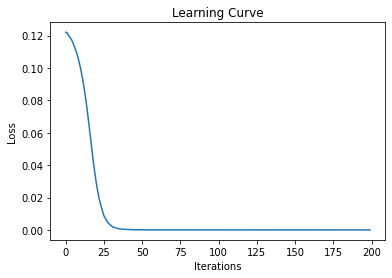

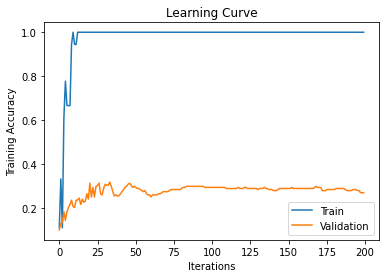

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.27053140096618356


In [ ]:
"""
Show that your model and training code is capable of overfitting on that small dataset. 
You should be able to obtain a 100% training accuracy on that small dataset relatively quickly 
(i.e. within a few hundred iterations, possibly more depending on your learning rate).
"""
cnn = CNN()
train(cnn, subset, valid_data, batch_size=18,weight_decay=0.0, learning_rate=0.001, num_epochs=200)

## Question 4. Training

### Part (a) -- 5 points

Train your first network on your training set.
Plot the training curve, and include your plot in your writeup.

Make sure that you are checkpointing frequently!

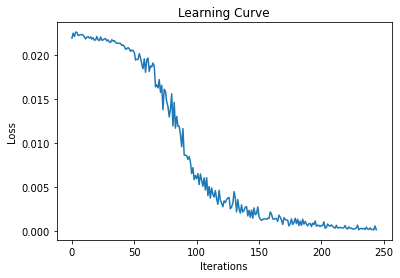

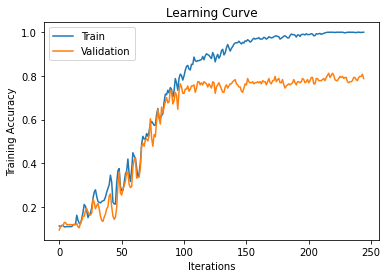

Final Training Accuracy: 0.9986357435197817
Final Validation Accuracy: 0.7874396135265701


In [ ]:
model = CNN()
train(model, train_data, valid_data, batch_size=100, weight_decay=0.0,
           learning_rate=0.001, num_epochs=35)

### Part (b) -- 2 points

You should have tried several hyperparameter choices before deciding on one set
of hyperparameters to use for Part (a).
In this section, briefly explain the hyperparamter choices that you tried, 
and how they impacted your training.

In [ ]:
# Your explanation goes here.



*   For hyperparameter batch_size=100, weight_decay=0.0, learning_rate=0.01, num_epochs=35, the model tend to overfitting to the data, obtaining the training accuracy of 100%. It capture too many features of the data and the model is complex with oscillation. 
*   For hyperparameter batch_size=100, weight_decay=0.0, learning_rate=0.0001, num_epochs=35, the model tend to underfitting to the data, obtaining the training accuracy of only 68%. It does not capture complex features of the data and the model is quite simple. 



### Part (c) -- 5 points

Train your second network on your training set.
Plot the training curve, and include your plot in your writeup.

Make sure that you are checkpointing frequently!

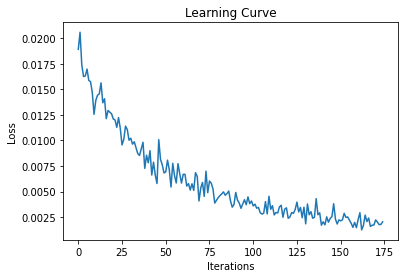

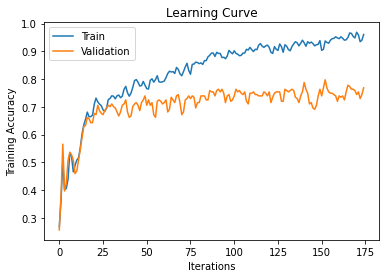

Final Training Accuracy: 0.9604365620736699
Final Validation Accuracy: 0.7681159420289855


In [ ]:
model_cnn_bn = CNN_bn()
train(model, train_data, valid_data, batch_size=100, weight_decay=0.0,
           learning_rate=0.001, num_epochs=25)

### Part (d) -- 2 points

You should have tried several hyperparameter choices before deciding on one set of hyperparameters to use for Part
(c). In this section, briefly explain the hyperparamter choices that you tried, and how they impacted your training.

In [ ]:
# Your explanation goes here.



*   For hyperparameter batch_size=100, weight_decay=0.0, learning_rate=0.001, num_epochs=35, the model tend to overfitting to the data, obtaining the training accuracy of 100%. The model does not generalize and is too complex with oscillation, which capture too many features of the data. 
*   For hyperparameter batch_size=100, weight_decay=0.0, learning_rate=0.1, num_epochs=35, the model tend to underfitting to the data, obtaining the training accuracy of only 12%. The model is too simple without capturing enough information from data. 










### Part (e) -- 2 pts

Out of all the models (i.e. parts (a) vs (c), and the various hyperparameter choices)
that you tried, which model is the "best"?
If you were to select a single set of weight values (checkpoints)
to deploy and use in a real application, which would you choose?

In [ ]:
# Your explanation goes here.

The model without batch normalization under hyperparameter batch_size=100, weight_decay=0.0, learning_rate=0.001, num_epochs=35 is the "best". I would use the weight values at iteration 100 because both validation and training accuracy are around 80%, and overfitting is minimal.


## Question 5. Transfer Learning

For many image classification tasks, it is generally not a good idea to train a
very large deep neural network model from scratch due to the enormous compute
requirements and lack of sufficient amounts of training data.

One of the better options is to try using an existing model that performs a
similar task to the one you need to solve. This method of using a
pre-trained network for other similar tasks is broadly termed
**Transfer Learning**. In this question, we will use Transfer Learning
to extract features from the hand gesture images. Then, train a smaller
network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, the AlexNet architecture played a pivotal role in
establishing Deep Neural Nets as a go-to tool for image classification
problems and we will use an ImageNet pre-trained AlexNet model to
extract features in this assignment.

### Part (a)

Here is the code to load the AlexNet network, with pretrained weights.
When you first run the code, PyTorch will download the pretrained weights
from the internet.

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

The `alexnet` model is split up into two components: `alexnet.features` and 
`alexnet.classifier`.  The first neural network component, `alexnet.features`,
is used to
computed convolutional features, which is taken as input in `alexnet.classifier`.

The neural network `alexnet.features` expects an image tensor of shape
Nx3x224x224 as inputs and it will output a tensor of shape Nx256x6x6 . (N = batch size).

Here is an example code snippet showing how you can compute the AlexNet
features for some images (your actual code might be different):

In [ ]:
img, label = train_data[0]
features = alexnet.features(img.unsqueeze(0)).detach()

Note that the `.detach()` at the end will be necessary in your code. The reason is that
PyTorch automatically builds computation graphs to be able to backpropagate
gradients. If we did not explicitly "detach" this tensor from the AlexNet portion
of the computation graph, PyTorch might try to backpropagate gradients to the AlexNet
weight and tune the AlexNet weights.

Compute the AlexNet features for each of your training, validation, and test data.
In other words, create three new arrays called `train_data_features`, `valid_data_features`
and `test_data_features`. Each of these arrays should contain tuples of the form 
`(alexnet_features, label)`

In [ ]:
#train data

train_data_features = []
for img, y in train_data:
  features = alexnet.features(img.unsqueeze(0)).detach()  # compute the alex net features based on the image
                                                          #1x256x6x6 tensor
  train_data_features.append((features, y),)


In [ ]:
#valid data
valid_data_features = []
for img, y in valid_data:
  features = alexnet.features(img.unsqueeze(0)).detach()  # compute the alex net features based on the image
                                                          #1x256x6x6 tensor
  valid_data_features.append((features, y),)

In [ ]:
#test data
test_data_features = []
for img, y in test_data:
  features = alexnet.features(img.unsqueeze(0)).detach()  # compute the alex net features based on the image
                                                          #1x256x6x6 tensor
  test_data_features.append((features, y),)


### Part (b)


Create a multi-layer preceptron that
takes **as input** these AlexNet features,
and makes a prediction. Your model should be a subclass of `nn.Module`.

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(256*6*6, 100)
        self.layer2 = nn.Linear(100, 9)        

    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6)
        activation1 = self.layer1(x)
        activation1 = torch.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

### Part (c)

Train the `MLP()` model for at least 6 epochs, and report
on the maximum validation accuracy that you can attain.

This model should train *much* faster since it has very few parameters.
However, this model should attain much better accuracy much faster!

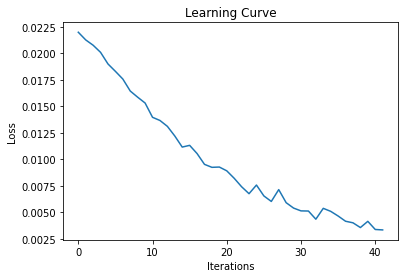

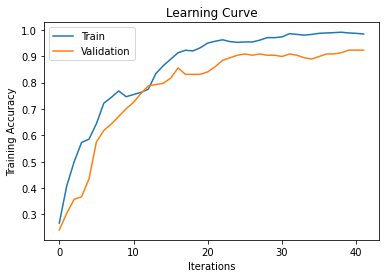

Final Training Accuracy: 0.9836289222373806
Final Validation Accuracy: 0.9227053140096618


In [ ]:
mlp = MLP()
train(mlp, train_data_features, valid_data_features, batch_size=100, weight_decay=0, learning_rate=0.0001, num_epochs=6)

## Question 6. Test Accuracy

### Part (a) -- 5 pts

Report the test accuracies of your **single best** model for the test set, including
any model that you trained (including in Q5).

In [ ]:
# Write your code here. Make sure to include the test accuracy in your report
print("MLP test accuracy: ", get_accuracy(mlp, test_data_features))
print("CNN test accuracy:", get_accuracy(model, test_data))
print("CNN with batch norm test accuracy:", get_accuracy(model_cnn_bn, test_data))


MLP test accuracy:  0.7847533632286996
CNN test accuracy: 0.6860986547085202
CNN with batch norm test accuracy: 0.10762331838565023


The single best model is the MLP model from question 5. Test accuracy is around 78.48%.

### Part (b) -- 1 pts

Display one image that your model correctly classified.

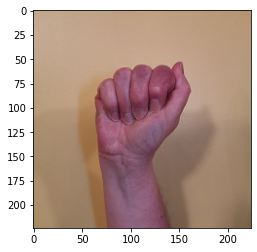

In [ ]:
x = train_data[0][0]
image = x.permute(1, 2, 0)
plt.imshow(image.numpy())
plt.show()

### Part (b) -- 1 pts

Display one image that your model incorrectly classified. (If your test performance was 100%, please just say so.)

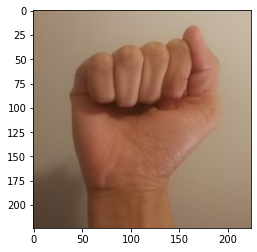

In [ ]:
x = train_data[12][0]
image = x.permute(1, 2, 0)
plt.imshow(image.numpy())
plt.show()

## Question 6. Work Allocation -- 2 pts

This question is to make sure that if you are working with a partner, that
you and your partner contributed equally to the assignment.

Please have each team member write down the times that you worked on the
assignment, and your contribution to the assignment.

In [ ]:
# Your answer goes here

Yiling Li: spend one and a half week on the assignment, completed Q1, Q2, Q3a and Q4, and do the review over other questions. 

Shijia Song: Spent a week and a half on assignment. Completed Q6, Q5,Q3c, Q3b, Q2c. Reviewed other questions.